In this notebook: 
 - distance calculation using Gaia parallax
 - new radial angular distance calculation 
 - ngood and sigma plots 
 - new spatial coordinate system (central to LMC) 

In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
import astropy.io.fits as fits
from astropy.table import Table, Column 
import utils

In [2]:
df = fits.getdata('LMC_EDR3_wo_cuts.fits')

In [3]:
def roi_cut(xcut,ycut,x,y): 
    from matplotlib.path import Path
    tupVerts = list(zip(xcut,ycut))
    points = np.vstack((x,y)).T
    p = Path(tupVerts) # make a polygon
    inside = p.contains_points(points)
    ind, = np.where(~inside)
    cutind, = np.where(inside)
    return ind, cutind
    print (ind, cutind)

In [4]:
def sphdist(lon1, lat1, lon2, lat2):
    """Calculate the angular distance between two sets of points.

    Parameters
    ----------
    lon1/lat1 : scalar or array_like
        first dataset, arrays of LON/LAT or RA/DEC
        both measured in degrees
    lon2/lat2 : scalar array_like
        second dataset, arrays of LON/LAT or RA/DEC
        both measured in degrees

    Returns
    -------
    dist: ndarrays
        The angular distance in degrees.
    """

    if (np.size(lon1) != np.size(lat1)):
        raise ValueError('lon1/lat1 must have same number of elements')
    if (np.size(lon2) != np.size(lat2)):
        raise ValueError('lon2/lat2 must have same number of elements')    

    cosa = np.sin(np.deg2rad(lat1))*np.sin(np.deg2rad(lat2))+np.cos(np.deg2rad(lat1))*np.cos(np.deg2rad(lat2))*np.cos(np.deg2rad(lon1-lon2))
    dist = np.rad2deg(np.arccos(cosa))

    return dist

In [5]:
## RGB cmd cut

def LMCParallax(df, ra, dec, radius=0.3):
    r = sphdist(ra, dec, df['ra'], df['dec'])
    res = np.where(r <= radius)
    df = df[res]
    xcut = [0.738710, 1.077419, 1.512903, 1.68, 2.035484, 2.4, 2.432258, 1.929032, 1.764516, 1.45, 0.7]
    ycut = [19.346753, 19.9, 19.441558, 18, 16.5, 16.1, 15.85, 15.487013, 15.603896, 16, 18.75]
    x = df['bp_rp']
    y = df['phot_g_mean_mag']
    (ind, cutind) = roi_cut(xcut,ycut,x,y)
    df = df[cutind]
    medpmra = np.nanmedian(df['pmra'])
    medpmdec = np.nanmedian(df['pmdec'])
    pndist = np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good = (abs(df['parallax']) < 3*df['parallax_error']) & (pndist<=2.0)
    medplx = np.nanmedian(df['parallax'][good]) 
    ngood = np.sum(good)
    sigma= (1/ngood)*np.sqrt(np.nansum((df['parallax_error'][good])**2)) #standard error of parallax
    return (ngood, medplx, sigma)


In [6]:
## RGB and AGB cmd cut

def LMCParallax2(df, ra, dec, radius=0.3):
    r = sphdist(ra, dec, df['ra'], df['dec'])
    res = np.where(r <= radius)
    df = df[res]
    xcut = [0.738710, 1.077419, 1.512903, 1.68, 2.035484, 2.4, 4, 3.9, 3, 2.15, 1.45, 0.7]
    ycut = [19.346753, 19.9, 19.441558, 18, 16.5, 16.1, 16, 15.4, 14.9, 14.9, 16, 18.75]
    x = df['bp_rp']
    y = df['phot_g_mean_mag']
    (ind, cutind) = roi_cut(xcut,ycut,x,y)
    df = df[cutind]
    medpmra = np.nanmedian(df['pmra'])
    medpmdec = np.nanmedian(df['pmdec'])
    pndist = np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good = (abs(df['parallax']) < 3*df['parallax_error']) & (pndist<=2.0)
    medplx = np.nanmedian(df['parallax'][good]) 
    ngood = np.sum(good)
    sigma= (1/ngood)*np.sqrt(np.nansum((df['parallax_error'][good])**2)) #standard error of parallax
    return (ngood, medplx, sigma)


In [7]:
## distance calculation with the RGB cmd cut 

"""dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])
cat = np.zeros([111,51],dtype=dtype)
for i in range (111):
    ra = (i/2) + 55
    for j in range (51):
        dec = (j/2) - 80
        (ngood, medplx, sigma) = LMCParallax(df,ra,dec) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx
        cat[i,j]['sigma']=sigma
        
acat = Table(cat)
acat.write('LMC_EDR3_dist2.fits', format='fits')"""

"dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])\ncat = np.zeros([111,51],dtype=dtype)\nfor i in range (111):\n    ra = (i/2) + 55\n    for j in range (51):\n        dec = (j/2) - 80\n        (ngood, medplx, sigma) = LMCParallax(df,ra,dec) \n        cat[i,j]['ra']=ra\n        cat[i,j]['dec']=dec\n        cat[i,j]['ngood']=ngood\n        cat[i,j]['parallax']=medplx\n        cat[i,j]['sigma']=sigma\n        \nacat = Table(cat)\nacat.write('LMC_EDR3_dist2.fits', format='fits')"

In [8]:
## distance calculation with the RGB and AGB cmd cut 

"""dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])
cat = np.zeros([111,51],dtype=dtype)
for i in range (111):
    ra = (i/2) + 55
    for j in range (51):
        dec = (j/2) - 80
        (ngood, medplx, sigma) = LMCParallax2(df,ra,dec) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx
        cat[i,j]['sigma']=sigma
        
acat2 = Table(cat)
acat2.write('LMC_EDR3_dist3.fits', format='fits')"""

"dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])\ncat = np.zeros([111,51],dtype=dtype)\nfor i in range (111):\n    ra = (i/2) + 55\n    for j in range (51):\n        dec = (j/2) - 80\n        (ngood, medplx, sigma) = LMCParallax2(df,ra,dec) \n        cat[i,j]['ra']=ra\n        cat[i,j]['dec']=dec\n        cat[i,j]['ngood']=ngood\n        cat[i,j]['parallax']=medplx\n        cat[i,j]['sigma']=sigma\n        \nacat2 = Table(cat)\nacat2.write('LMC_EDR3_dist3.fits', format='fits')"

In [9]:
acat = Table(fits.getdata('LMC_EDR3_dist2.fits'))
acat2 = Table(fits.getdata('LMC_EDR3_dist3.fits'))

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

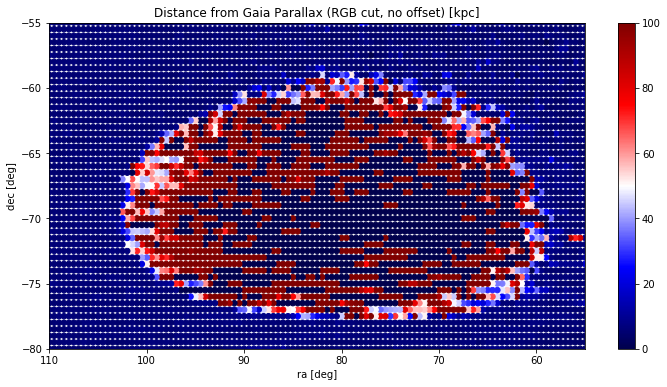

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

Text(0.5,1,'Distance from Gaia Parallax (RGB+AGB cut, no offset) [kpc]')

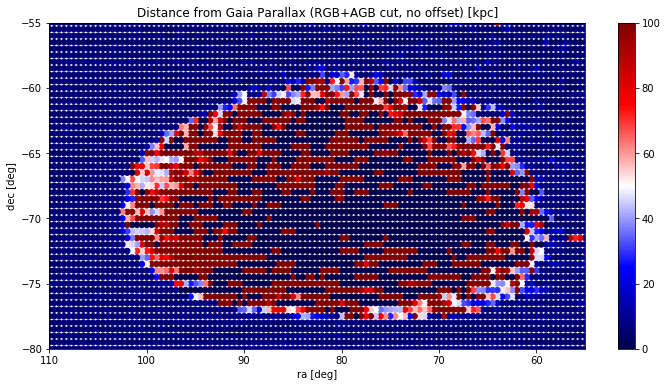

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=1/acat2['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, no offset) [kpc]')

In [12]:
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

In [13]:
"""fig = plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')
fig.canvas.mpl_connect('button_press_event', onclick)
#%matplotlib qt"""

"fig = plt.figure(figsize=(12,6))\nplt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)\nplt.colorbar()\nplt.xlim([110,55])\nplt.ylim([-80,-55])\nplt.xlabel('ra [deg]')\nplt.ylabel('dec [deg]')\nplt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')\nfig.canvas.mpl_connect('button_press_event', onclick)\n#%matplotlib qt"

In [14]:
xcut_new = [96.619624, 98.985215, 97.580645, 95.584677, 93.662634, 90.483871, 85.604839, 74.737903, 70.228495, 65.275538, 62.096774, 61.283602, 63.870968, 69.563172, 77.768817, 86.048387, 92.923387]
ycut_new = [-74.372294, -71.071429, -68.257576, -65.606061, -63.874459, -61.872294, -61.006494, -60.952381, -62.196970, -65.606061, -68.798701, -73.290043, -74.534632, -75.616883, -76.645022, -76.590909, -76.103896]
x_new = acat['ra'].ravel()
y_new = acat['dec'].ravel()

(ind_new, cutind_new) = roi_cut(xcut_new,ycut_new,x_new,y_new)


Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

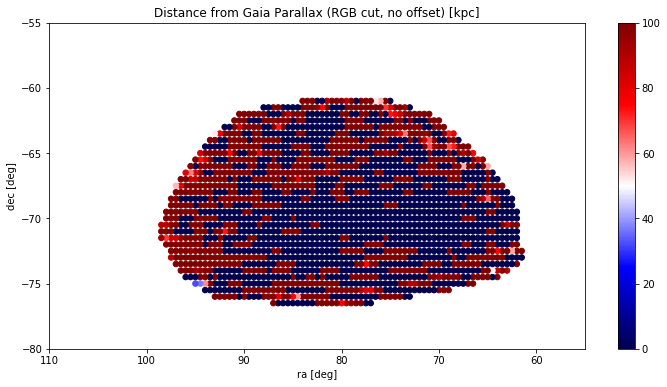

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'].ravel()[cutind_new], acat['dec'].ravel()[cutind_new], c=1/acat['parallax'].ravel()[cutind_new], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

#%matplotlib inline

In [16]:
cut_new = []
for i in range(len(xcut_new)):
    cut_new.append([xcut_new[i], ycut_new[i]])

In [17]:
cut_new.append(cut_new[0])
x_new, y_new = zip(*cut_new)

In [122]:
xcut = [102.163978, 97.506720, 91.962366, 84.939516, 74.294355, 68.158602, 61.801075, 60.692204, 60.618280, 63.131720, 66.975806, 75.698925, 84.274194, 90.557796, 98.467742, 102.163978]
ycut = [-67.067100, -63.603896, -61.493506, -60.357143, -59.870130, -61.655844, -66.309524, -71.179654, -73.290043, -75.183983, -76.536797, -77.510823, -77.294372, -76.969697, -74.642857, -71.720779]
x = acat['ra'].ravel()
y = acat['dec'].ravel()

(ind, cutind) = roi_cut(xcut,ycut,x,y)


Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

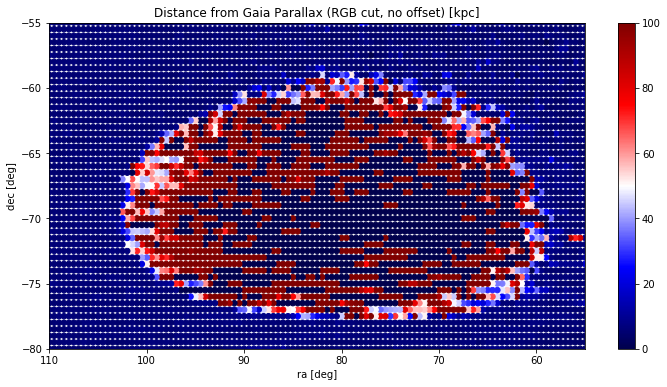

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

#%matplotlib inline

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

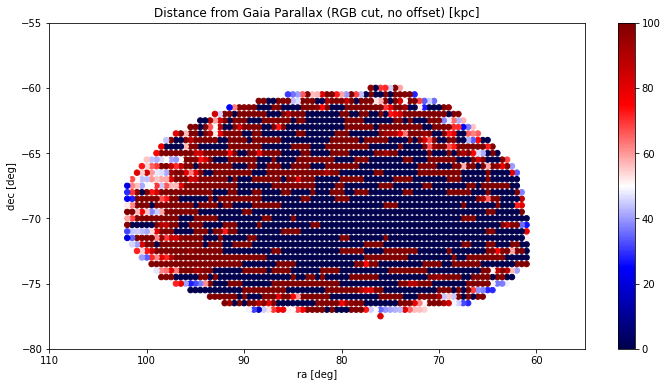

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'].ravel()[cutind], acat['dec'].ravel()[cutind], c=1/acat['parallax'].ravel()[cutind], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

In [21]:
cut = []
for i in range(len(xcut)):
    cut.append([xcut[i], ycut[i]])

In [22]:
cut.append(cut[0])
x, y = zip(*cut)

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

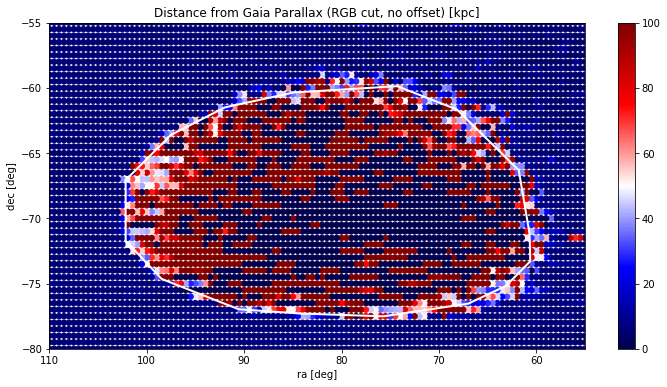

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

#%matplotlib inline

In [24]:
np.mean(1/(acat['parallax'].ravel()[cutind] + 0.02366132))

49.000027226790046

In [25]:
print('Gaia parallax offset with RGB cut: {}'.format(-0.02366132))

Gaia parallax offset with RGB cut: -0.02366132


In [26]:
acat['parallax'] = acat['parallax'] + 0.02366132
acat['dist'] = 1/acat['parallax']

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, 0.02366132 mas offset) [kpc]')

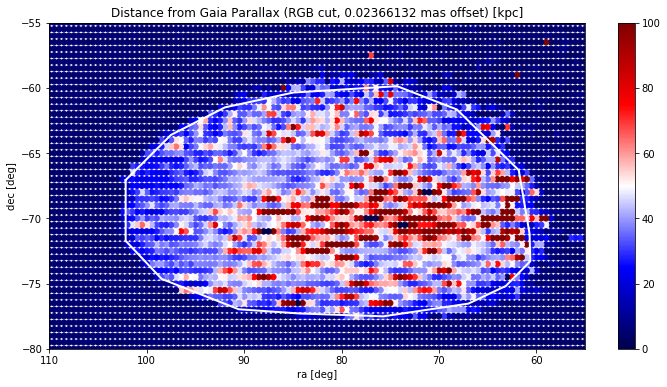

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['dist'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02366132 mas offset) [kpc]')

#%matplotlib inline

5

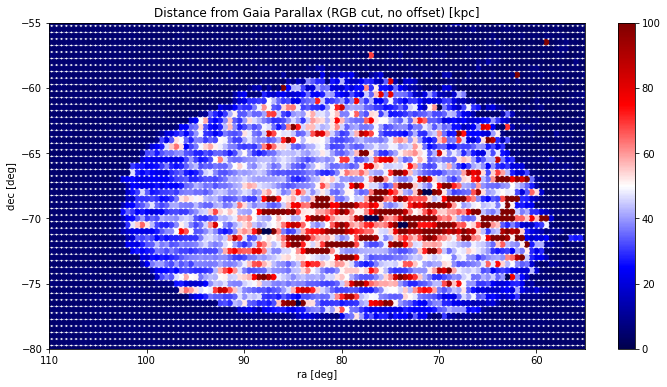

In [28]:
fig = plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')
fig.canvas.mpl_connect('button_press_event', onclick)
#%matplotlib qt

In [121]:
xcut2 = [78.877688, 83.830645, 87.083333, 86.787634, 83.534946, 77.990591, 74.737903, 68.750000, 66.606183, 70.524194, 75.403226]
ycut2 = [-68.095238, -68.311688, -70.530303, -71.937229, -73.452381, -72.424242, -72.099567, -72.099567, -70.205628, -67.662338, -67.229437]
x2 = acat['ra'].ravel()[cutind]
y2 = acat['dec'].ravel()[cutind]

(ind2, cutind2) = roi_cut(xcut2,ycut2,x2,y2)


Text(0.5,1,'Distance from Gaia Parallax (RGB cut, 0.02366132 mas offset) [kpc]')

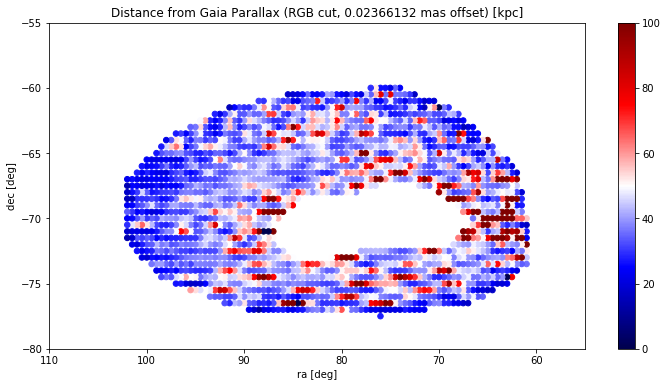

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'].ravel()[cutind][ind2], acat['dec'].ravel()[cutind][ind2], c=acat['dist'].ravel()[cutind][ind2], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02366132 mas offset) [kpc]')

#%matplotlib inline

In [31]:
cut2 = []
for i in range(len(xcut2)):
    cut2.append([xcut2[i], ycut2[i]])

In [32]:
cut2.append(cut2[0])
x2, y2 = zip(*cut2)

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, 0.02366132 offset) [kpc]')

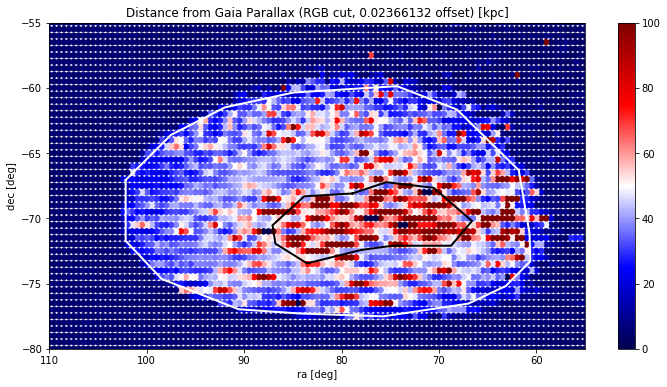

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='black')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02366132 offset) [kpc]')

#%matplotlib inline

In [34]:
np.mean(1/(acat['parallax'].ravel()[cutind][ind2] - 0.00037106))

48.99994852642898

In [35]:
print('NEW Gaia parallax offset with RGB cut: {}'.format(-0.02366132 + 0.00037106))

NEW Gaia parallax offset with RGB cut: -0.02329026


In [36]:
acat['parallax'] = acat['parallax'] - 0.00037106
acat['dist'] = 1/acat['parallax']

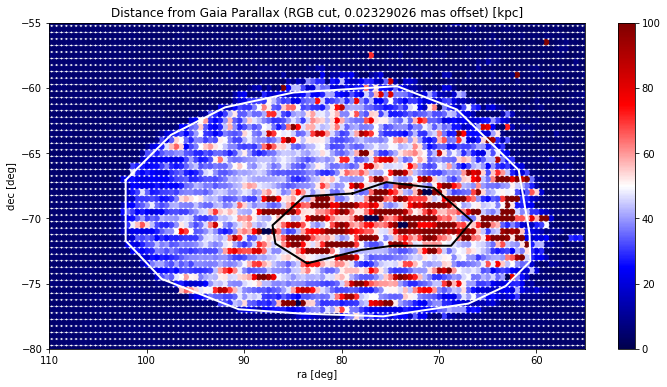

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['dist'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='black')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02329026 mas offset) [kpc]')

#%matplotlib inline
plt.savefig('dists1')

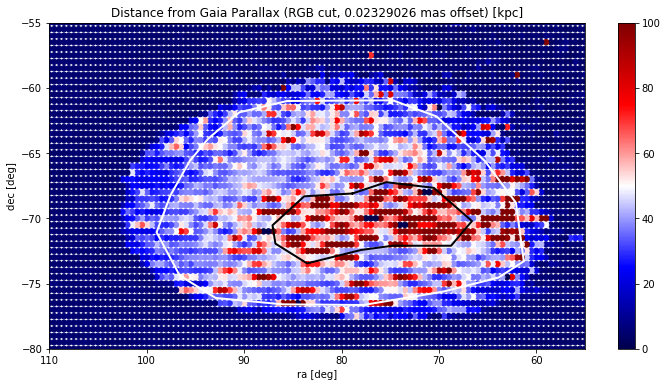

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['dist'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x_new, y_new, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='black')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02329026 mas offset) [kpc]')

#%matplotlib inline
plt.savefig('dists1')

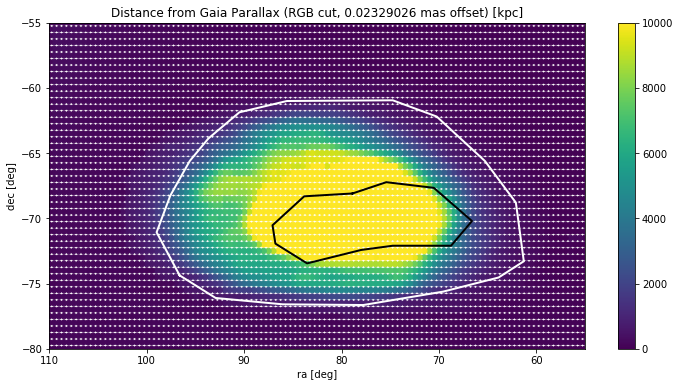

In [39]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['ngood'], s=30, vmin=0, vmax=10000)
plt.colorbar()
plt.plot(x_new, y_new, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='black')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02329026 mas offset) [kpc]')

#%matplotlib inline
plt.savefig('dists1')

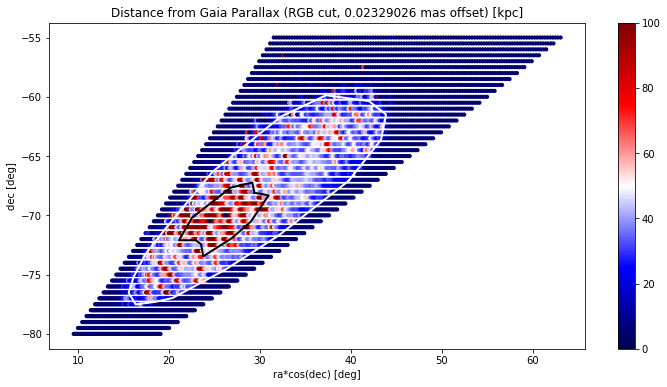

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra']*np.cos(np.radians(acat['dec'])), acat['dec'], c=acat['dist'], s=10, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x*np.cos(np.radians(y)), y, linewidth=2, c='white')
plt.plot(x2*np.cos(np.radians(y2)), y2, linewidth=2, c='black')
#plt.xlim([110,55])
#plt.ylim([-80,-55])
plt.xlabel('ra*cos(dec) [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02329026 mas offset) [kpc]')

#%matplotlib inline
plt.savefig('dists1_')

Text(0.5,1,'Distance from Gaia Parallax (RGB+AGB cut, no offset) [kpc]')

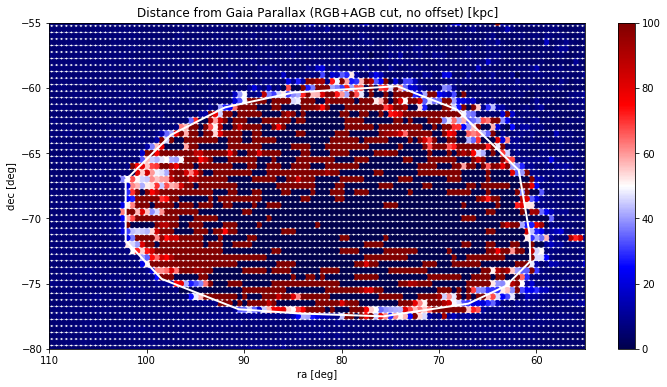

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=1/acat2['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, no offset) [kpc]')

#%matplotlib inline

In [42]:
np.mean(1/(acat2['parallax'].ravel()[cutind] + 0.02363518))

48.99990795436928

In [43]:
print('Gaia parallax offset with RGB+AGB cut: {}'.format(-0.02363518))

Gaia parallax offset with RGB+AGB cut: -0.02363518


In [44]:
acat2['parallax'] = acat2['parallax'] + 0.02363518
acat2['dist'] = 1/acat2['parallax']

Text(0.5,1,'Distance from Gaia Parallax (RGB+AGB cut, 0.02363518 mas offset) [kpc]')

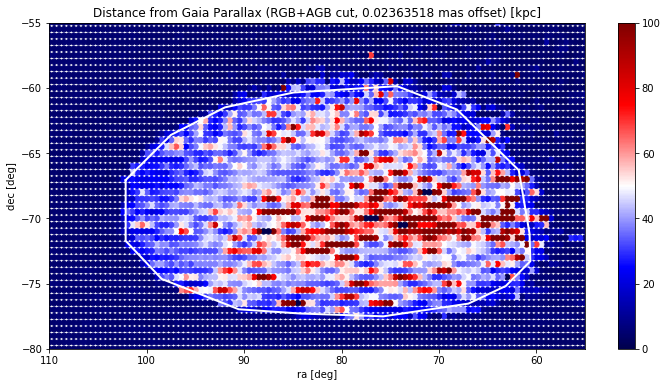

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=1/acat2['parallax'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, 0.02363518 mas offset) [kpc]')

#%matplotlib inline

Text(0.5,1,'Distance from Gaia Parallax (RGB+AGB cut, 0.02366132 offset) [kpc]')

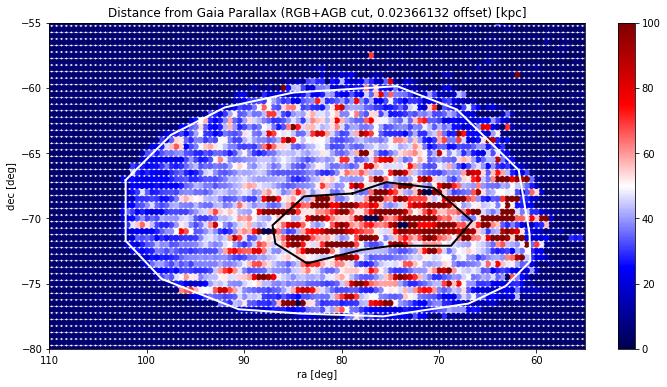

In [46]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=acat2['dist'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='black')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, 0.02366132 offset) [kpc]')

#%matplotlib inline

In [47]:
np.mean(1/(acat2['parallax'].ravel()[cutind][ind2] - 0.00027818))

49.00003510942841

In [48]:
print('NEW Gaia parallax offset with RGB+AGB cut: {}'.format(-0.02363518 + 0.00027818))

NEW Gaia parallax offset with RGB+AGB cut: -0.023357


In [49]:
acat2['parallax'] = acat2['parallax'] - 0.00027818
acat2['dist'] = 1/acat2['parallax']

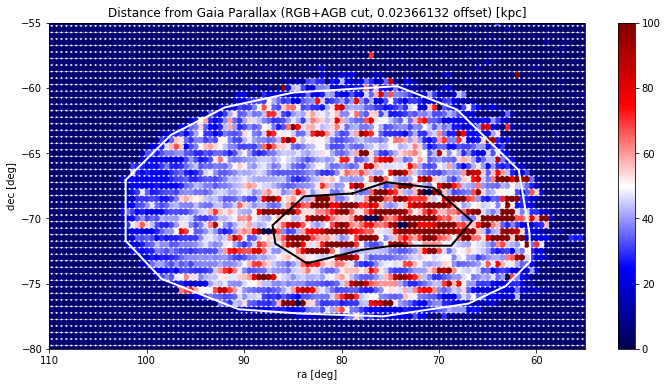

In [50]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=acat2['dist'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='black')
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, 0.02366132 offset) [kpc]')

#%matplotlib inline
plt.savefig('dists2')

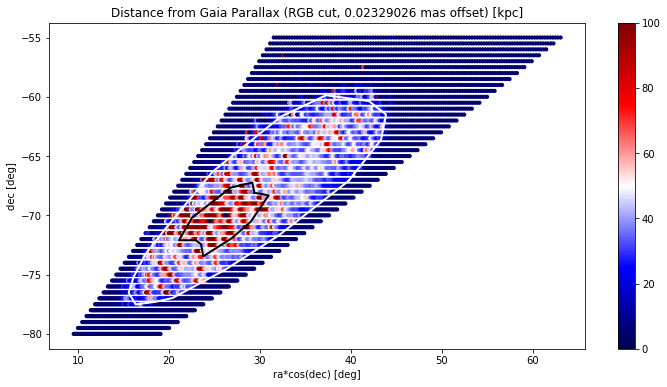

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra']*np.cos(np.radians(acat['dec'])), acat['dec'], c=acat['dist'], s=10, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x*np.cos(np.radians(y)), y, linewidth=2, c='white')
plt.plot(x2*np.cos(np.radians(y2)), y2, linewidth=2, c='black')
#plt.xlim([110,55])
#plt.ylim([-80,-55])
plt.xlabel('ra*cos(dec) [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, 0.02329026 mas offset) [kpc]')

#%matplotlib inline
plt.savefig('dists2_')

In [52]:
## use binned statistic 2d 
## plot with 1 deg steps, 0.5 radius 
## send David data after cuts 

In [53]:
## distance calculation with the RGB cmd cut, 1 deg steps, 0.5 deg radius

"""dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])
cat = np.zeros([56,26],dtype=dtype)
for i in range (56):
    ra = i + 55
    for j in range (26):
        dec = j - 80
        (ngood, medplx, sigma) = LMCParallax(df,ra,dec,radius=0.5) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx
        cat[i,j]['sigma']=sigma
        
acat = Table(cat)
acat.write('LMC_EDR3_dist4.fits', format='fits')"""

"dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])\ncat = np.zeros([56,26],dtype=dtype)\nfor i in range (56):\n    ra = i + 55\n    for j in range (26):\n        dec = j - 80\n        (ngood, medplx, sigma) = LMCParallax(df,ra,dec,radius=0.5) \n        cat[i,j]['ra']=ra\n        cat[i,j]['dec']=dec\n        cat[i,j]['ngood']=ngood\n        cat[i,j]['parallax']=medplx\n        cat[i,j]['sigma']=sigma\n        \nacat = Table(cat)\nacat.write('LMC_EDR3_dist4.fits', format='fits')"

In [113]:
## distance calculation with the RGB and AGB cmd cut, 1 deg steps, 0.5 deg radius

"""dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])
cat = np.zeros([56,26],dtype=dtype)
for i in range (56):
    ra = i + 55
    for j in range (26):
        dec = j - 80
        (ngood, medplx, sigma) = LMCParallax2(df,ra,dec,radius=0.5) 
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx
        cat[i,j]['sigma']=sigma
        
acat2 = Table(cat)
acat2.write('LMC_EDR3_dist5.fits', format='fits')"""

"dtype = np.dtype([('ra',float),('dec',float),('ngood',int),('parallax',float),('sigma',float)])\ncat = np.zeros([56,26],dtype=dtype)\nfor i in range (56):\n    ra = i + 55\n    for j in range (26):\n        dec = j - 80\n        (ngood, medplx, sigma) = LMCParallax2(df,ra,dec,radius=0.5) \n        cat[i,j]['ra']=ra\n        cat[i,j]['dec']=dec\n        cat[i,j]['ngood']=ngood\n        cat[i,j]['parallax']=medplx\n        cat[i,j]['sigma']=sigma\n        \nacat2 = Table(cat)\nacat2.write('LMC_EDR3_dist5.fits', format='fits')"

In [55]:
acat = Table(fits.getdata('LMC_EDR3_dist4.fits'))
acat2 = Table(fits.getdata('LMC_EDR3_dist5.fits'))

In [56]:
xcut = [102.163978, 97.506720, 91.962366, 84.939516, 74.294355, 68.158602, 61.801075, 60.692204, 60.618280, 63.131720, 66.975806, 75.698925, 84.274194, 90.557796, 98.467742, 102.163978]
ycut = [-67.067100, -63.603896, -61.493506, -60.357143, -59.870130, -61.655844, -66.309524, -71.179654, -73.290043, -75.183983, -76.536797, -77.510823, -77.294372, -76.969697, -74.642857, -71.720779]
x = acat['ra'].ravel()
y = acat['dec'].ravel()

(ind, cutind) = roi_cut(xcut,ycut,x,y)


In [57]:
xcut2 = [78.877688, 83.830645, 87.083333, 86.787634, 83.534946, 77.990591, 74.737903, 68.750000, 66.606183, 70.524194, 75.403226]
ycut2 = [-68.095238, -68.311688, -70.530303, -71.937229, -73.452381, -72.424242, -72.099567, -72.099567, -70.205628, -67.662338, -67.229437]
x2 = acat['ra'].ravel()[cutind]
y2 = acat['dec'].ravel()[cutind]

(ind2, cutind2) = roi_cut(xcut2,ycut2,x2,y2)


In [58]:
cut = []
for i in range(len(xcut)):
    cut.append([xcut[i], ycut[i]])

cut.append(cut[0])
x, y = zip(*cut)

In [59]:
cut2 = []
for i in range(len(xcut2)):
    cut2.append([xcut2[i], ycut2[i]])

cut2.append(cut2[0])
x2, y2 = zip(*cut2)

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

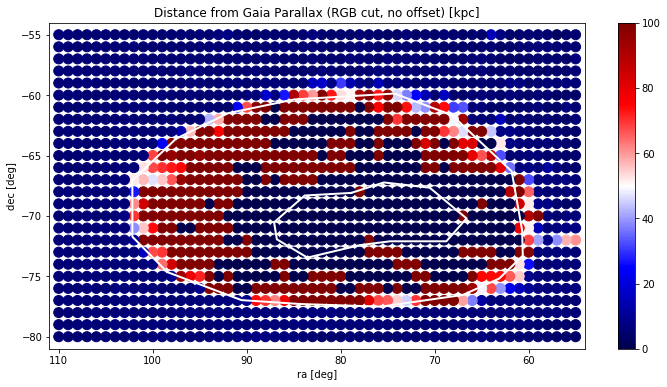

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=1/acat['parallax'], s=100, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='white')
plt.xlim([111,54])
plt.ylim([-81,-54])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

#%matplotlib inline

In [61]:
np.mean(1/(acat['parallax'].ravel()[cutind] + 0.02278661))

49.000005932624106

In [62]:
np.mean(1/(acat['parallax'].ravel()[cutind][ind2] + 0.02023734))

49.00000394116054

In [63]:
print('Parallax offset for outside cut (RGB cut): {}'.format(0.02278661))
print('Parallax offset for outside and inside cut (RGB cut): {}'.format(0.02023734))

Parallax offset for outside cut (RGB cut): 0.02278661
Parallax offset for outside and inside cut (RGB cut): 0.02023734


In [64]:
acat['parallax'] = acat['parallax'] + 0.02023734
acat['dist'] = 1/acat['parallax']

Text(0.5,1,'Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

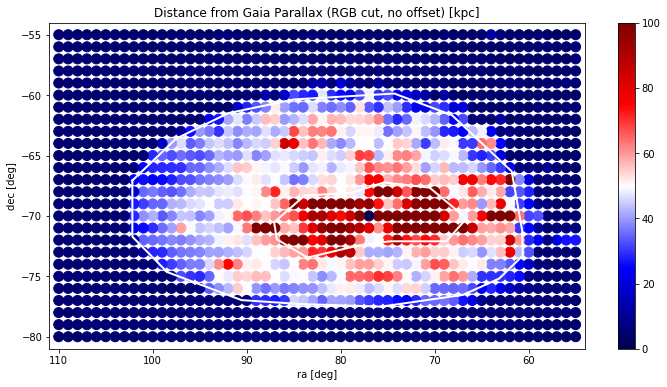

In [65]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['dist'], s=100, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='white')
plt.xlim([111,54])
plt.ylim([-81,-54])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut, no offset) [kpc]')

#%matplotlib inline

Text(0.5,1,'Distance from Gaia Parallax (RGB+AGB cut, no offset) [kpc]')

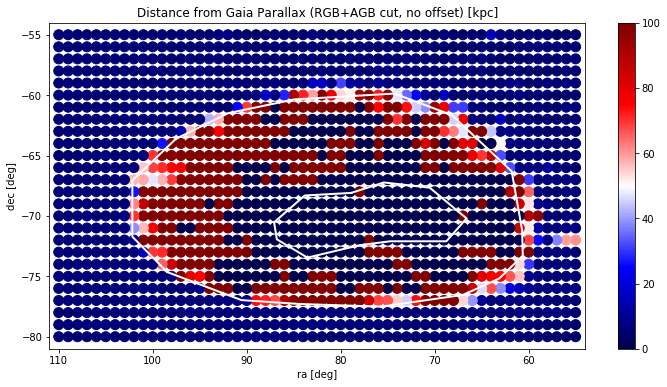

In [66]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=1/acat2['parallax'], s=100, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='white')
plt.xlim([111,54])
plt.ylim([-81,-54])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, no offset) [kpc]')

#%matplotlib inline

In [67]:
np.mean(1/(acat2['parallax'].ravel()[cutind] + 0.0229648))

49.00000384772237

In [68]:
np.mean(1/(acat2['parallax'].ravel()[cutind][ind2] + 0.0204175))

48.999998725474754

In [69]:
print('Parallax offset for outside cut (RGB+AGB cut): {}'.format(0.0229648))
print('Parallax offset for outside and inside cut (RGB+AGB cut): {}'.format(0.0204175))

Parallax offset for outside cut (RGB+AGB cut): 0.0229648
Parallax offset for outside and inside cut (RGB+AGB cut): 0.0204175


In [70]:
acat2['parallax'] = acat2['parallax'] + 0.0204175
acat2['dist'] = 1/acat2['parallax']

Text(0.5,1,'Distance from Gaia Parallax (RGB+AGB cut, 0.0204175 offset) [kpc]')

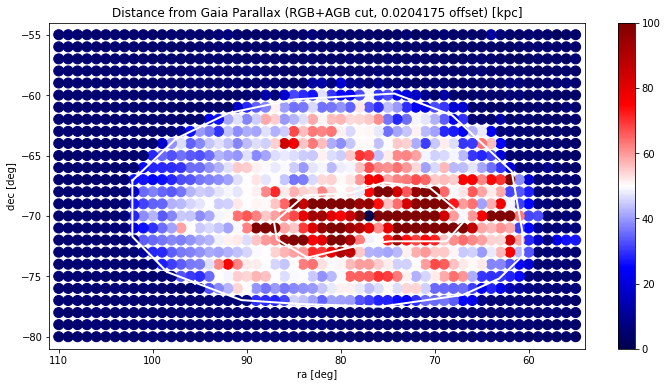

In [71]:
plt.figure(figsize=(12,6))
plt.scatter(acat2['ra'], acat2['dec'], c=acat2['dist'], s=100, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.plot(x, y, linewidth=2, c='white')
plt.plot(x2, y2, linewidth=2, c='white')
plt.xlim([111,54])
plt.ylim([-81,-54])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Distance from Gaia Parallax (RGB+AGB cut, 0.0204175 offset) [kpc]')

#%matplotlib inline

In [90]:
acat = Table(fits.getdata('LMC_EDR3_dist2.fits'))
acat['parallax'] = acat['parallax'] + 0.02329026
acat['dist'] = 1/acat['parallax']
acat2 = Table(fits.getdata('LMC_EDR3_dist3.fits'))

Text(0.5,1,'Standard Error in Median Parallax')

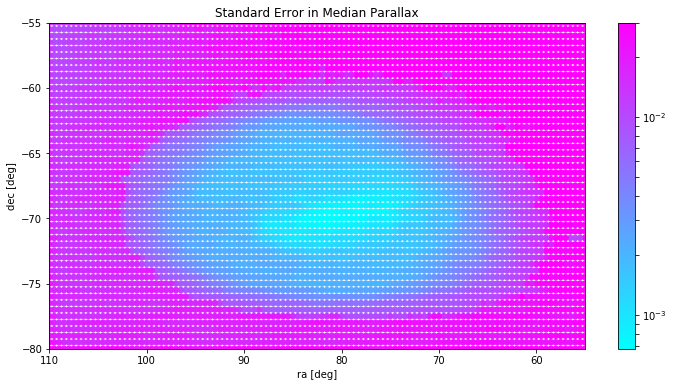

In [120]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['sigma'], s=30, vmax=0.03, cmap=plt.cm.cool, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Standard Error in Median Parallax')

#%matplotlib inline

In [123]:
np.mean(acat['sigma'].ravel()[cutind][ind2])\

0.0061112209577516745

Text(0.5,1,'Number of points included in Average')

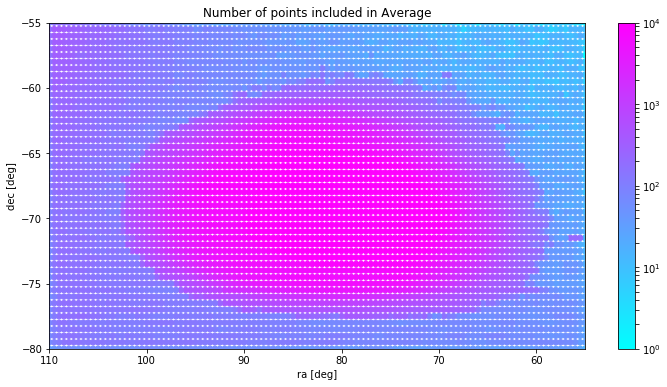

In [74]:
plt.figure(figsize=(12,6))
plt.scatter(acat['ra'], acat['dec'], c=acat['ngood'], s=30, vmax=10000, norm=mpl.colors.LogNorm(), cmap=plt.cm.cool)
plt.colorbar()
plt.xlim([110,55])
plt.ylim([-80,-55])
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.title('Number of points included in Average')


In [75]:
from coords import rotsphcen
from coords import rotsph
from astropy.coordinates import SkyCoord, Longitude

In [76]:
c = SkyCoord(ra=acat['ra'], dec=acat['dec'], frame='icrs', unit='deg')

In [77]:
l = Column(name='Longitude', data=c.galactic.l)
b = Column(name='Latitude', data=c.galactic.b)

In [78]:
acat.add_column(l)
acat.add_column(b)

In [79]:
cen = SkyCoord(ra=82.25, dec=-69.5, frame='icrs', unit='deg')
clon = np.array(cen.galactic.l)
clat = np.array(cen.galactic.b)

In [80]:
nlon, nlat = rotsphcen(acat['Longitude'], acat['Latitude'], clon, clat)

Text(0.5,1,'Distance from Gaia Parallax (RGB cut) [kpc]')

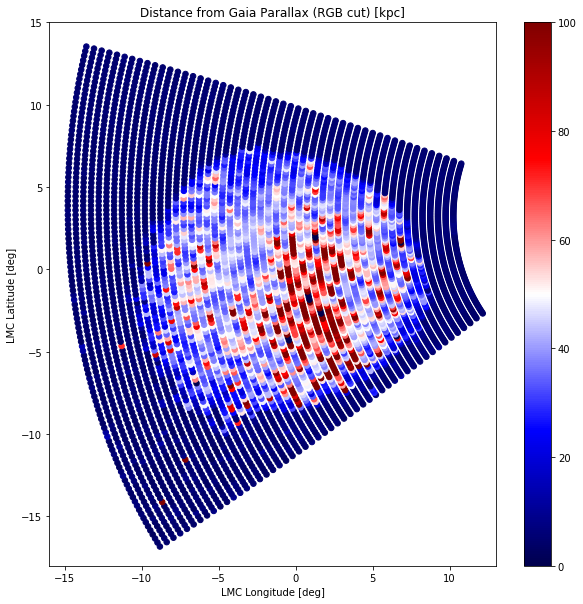

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(nlon, nlat, c=acat['dist'], s=30, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlim([-16,13])
plt.ylim([-18,15])
plt.xlabel('LMC Longitude [deg]')
plt.ylabel('LMC Latitude [deg]')
plt.title('Distance from Gaia Parallax (RGB cut) [kpc]')


In [101]:
nc = SkyCoord(l=nlon, b=nlat, frame='galactic', unit='deg')

In [105]:
nra = np.array(nc.icrs.ra)
ndec = np.array(nc.icrs.dec)

Text(0.5,1,'Distance from Gaia Parallax (RGB cut) [kpc]')

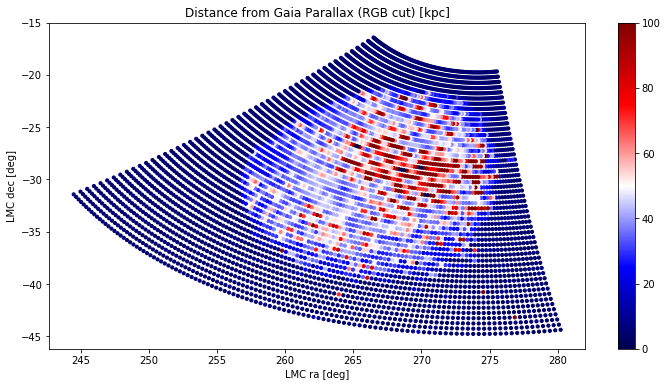

In [112]:
plt.figure(figsize=(12,6))
plt.scatter(nra, ndec, c=acat['dist'], s=10, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
#plt.xlim([-16,13])
#plt.ylim([-18,15])
plt.xlabel('LMC ra [deg]')
plt.ylabel('LMC dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut) [kpc]')


In [114]:
cra = 82.25
cdec = -69.5
nra2, ndec2 = rotsphcen(acat['ra'], acat['dec'], cra, cdec)

Text(0.5,1,'Distance from Gaia Parallax (RGB cut) [kpc]')

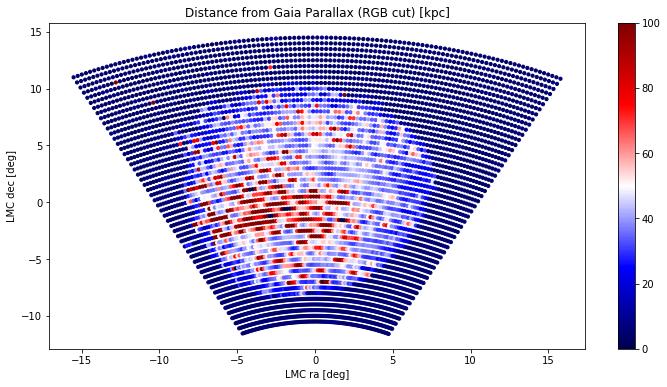

In [115]:
plt.figure(figsize=(12,6))
plt.scatter(nra2, ndec2, c=acat['dist'], s=10, vmin=0, vmax=100, cmap=plt.cm.seismic)
plt.colorbar()
#plt.xlim([-16,13])
#plt.ylim([-18,15])
plt.xlabel('LMC ra [deg]')
plt.ylabel('LMC dec [deg]')
plt.title('Distance from Gaia Parallax (RGB cut) [kpc]')


In [ ]:
## convert coordinate system
## change step in ra 
## extend inside cut to the left 
## check cmd of blue edge points 
## run match code with one sigma value 0.003 mas ish 

## add ngood and sigma plot to paper 
## plot best guess model next to data, change parameters by hand 
## DR2 comparison plot

##UPLOAD TO GITHUB